# Historical Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a historical 3 day period.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
start = '2016-12-01 00:00:00'
end = '2016-12-03 23:30:00'
year = int(start[0:4])
# time step as fraction of hour
time_step = 0.5

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [4]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='historical', merge_generators=True)

C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [5]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pypsa\components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pypsa\components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pypsa\components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pypsa\components.py:323: FutureWarning:

Setting an it

To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of their thermal rating

In [6]:
contingency_factor = 0.7
network.lines.s_max_pu[0:99] *= contingency_factor

## Running the optimisation

In [7]:
network.optimize(network.snapshots, solver_name="gurobi", pyomo=False)

Index(['16', '99', '100', '101', '102', '103', '104'], dtype='object', name='Line')


Index(['16', '99', '100', '101', '102', '103', '104'], dtype='object', name='Line')
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\linopy\expressions.py:176: FutureWarning:

the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\linopy\expressions.py:176: FutureWarning:

the `pandas.MultiIndex` object(s) passed as 'StorageUnit' coordinate(s) or data variable(s) will no longer be implicitly promoted an

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-11


Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00, 22.53it/s]


Read LP format model from file C:\Users\alyden\AppData\Local\Temp\linopy-problem-z_b96piw.lp
Reading time = 0.74 seconds
obj: 426654 rows, 111456 columns, 753944 nonzeros
No parameters matching 'pyomo' found
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 426654 rows, 111456 columns and 753944 nonzeros
Model fingerprint: 0x9f6c01b4
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [3e+00, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-31, 9e+03]
Presolve removed 419121 rows and 89964 columns
Presolve time: 0.28s
Presolved: 7533 rows, 22636 columns, 46342 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 2.989e+04
 Factor NZ  : 1.477e+05 (roughly 

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 111456 primals, 426654 duals
Objective: 7.92e+07
Solver model: available
Solver message: 2

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\linopy\common.py:124: UserWarning:

Coordinates across variables not equal. Perform outer join.

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Line-fix-s-lower, Line-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pypsa\optimization\optimize.py:473: FutureWarning:

DataFrame.groupby with axis=1 is d

('ok', 'optimal')

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [8]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# interconnector exports
exports = network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1
interconnector_export = exports[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

C:\Users\alyden\AppData\Local\Temp\ipykernel_13604\4020419505.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\alyden\AppData\Local\Temp\ipykernel_13604\4020419505.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnectors Import,Landfill Gas,Hydro,Natural Gas,Nuclear,Oil,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,Pumped Storage Hydroelectric,Biomass
snapshot,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,244.200001,0.0,0.0,0.0,356.436,1159.000046,743.500001,77.048420,19054.167342,6510.14,0.0,44.4,23.0,9.320824,0.0,2029.771917,4308.015596,440.000000,1032.100002
2016-12-01 00:30:00,244.200001,0.0,0.0,0.0,356.436,1291.000043,743.500001,66.636471,17860.361848,6510.14,0.0,44.4,23.0,8.061253,0.0,2102.063143,4042.882466,572.318877,1032.100002
2016-12-01 01:00:00,244.200001,0.0,0.0,0.0,356.436,1297.000034,743.500001,66.115874,18353.223942,6510.14,0.0,44.4,23.0,7.998275,0.0,2137.095635,4403.397135,239.492947,1032.100002
2016-12-01 01:30:00,244.200001,0.0,0.0,0.0,356.436,1297.000037,743.500001,65.074679,19025.956426,6510.14,0.0,44.4,23.0,7.872317,0.0,2134.869392,4431.714010,259.837220,1032.100002
2016-12-01 02:00:00,244.200001,0.0,0.0,0.0,356.436,1298.000036,743.500001,56.224523,18829.795818,6510.14,0.0,44.4,23.0,6.801682,0.0,2119.227793,4212.193045,445.081121,1032.100002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-03 21:30:00,244.200001,0.0,0.0,0.0,356.436,1686.000041,743.500001,216.685647,26487.083223,6510.14,0.0,44.4,24.0,25.314354,0.0,1908.477049,916.763755,0.000000,1032.100002
2016-12-03 22:00:00,244.200001,0.0,0.0,0.0,356.436,1416.000017,743.500001,108.342823,25468.278089,6510.14,0.0,44.4,24.0,12.657177,0.0,1921.804079,966.242318,0.000000,1032.100002
2016-12-03 22:30:00,244.200001,0.0,0.0,0.0,356.436,1439.000036,743.500001,98.493476,24045.990453,6510.14,0.0,44.4,24.0,11.506524,0.0,1927.268289,1000.065340,0.000000,1032.100002


Graph the power output of the different generation types...

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1608: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



Text(0.5, 0, '')

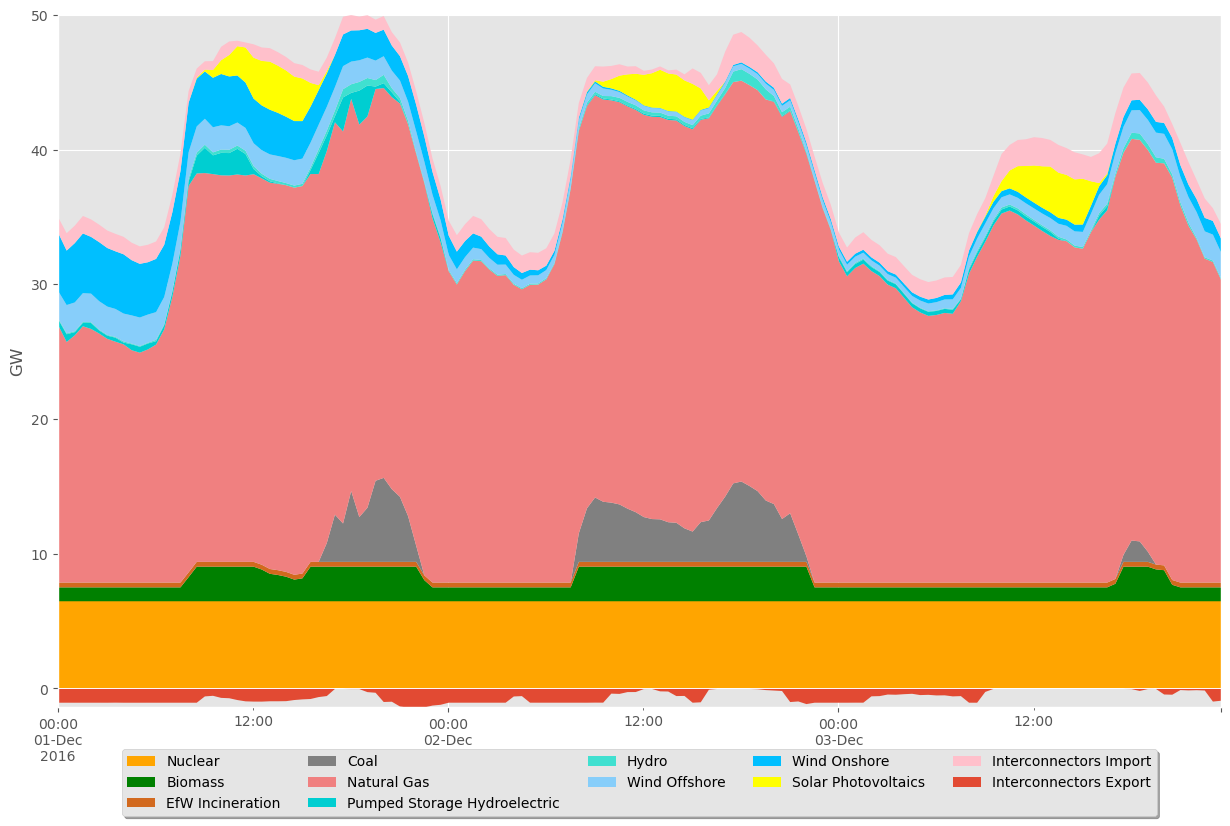

In [9]:
cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        'EfW Incineration',
        "Coal", "Oil", "Natural Gas",
        "Pumped Storage Hydroelectric", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Anaerobic Digestion': 'green',
          'EfW Incineration': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

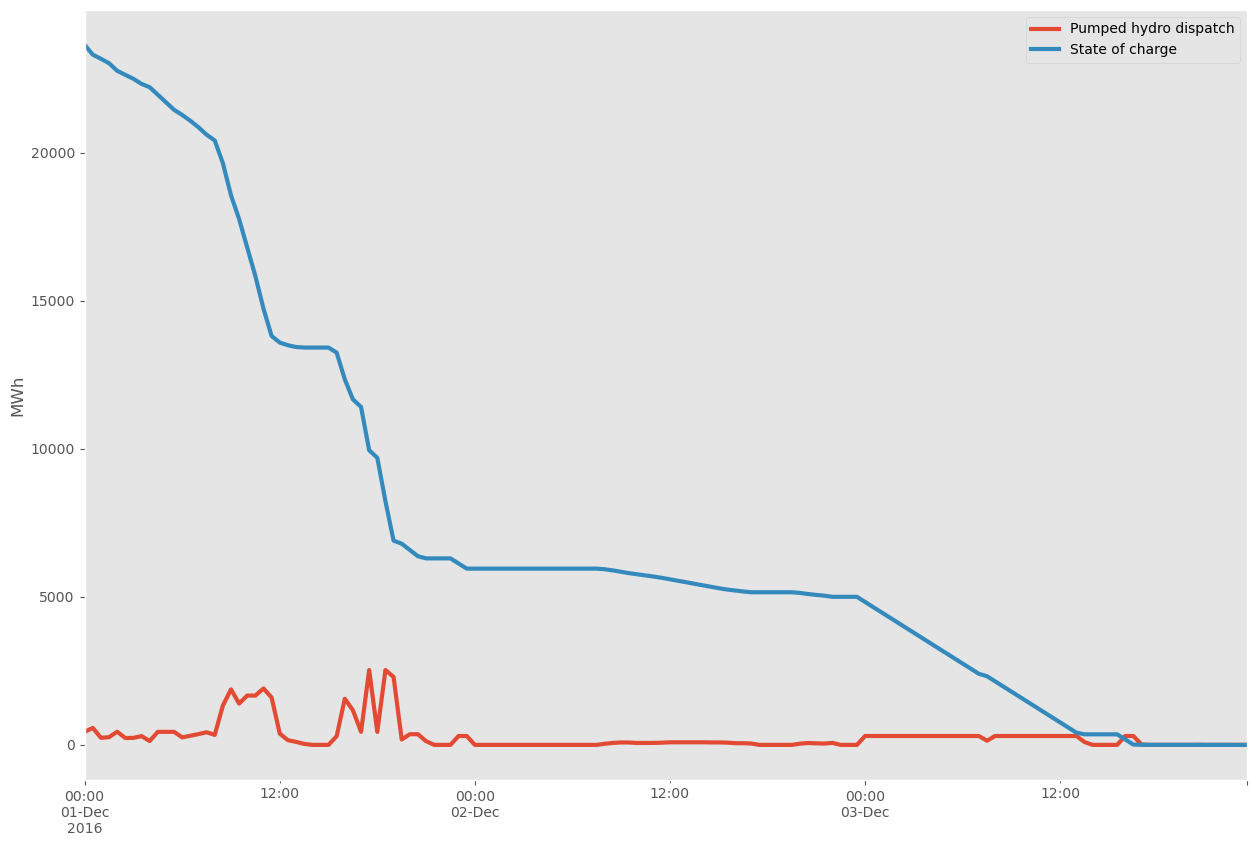

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting line loading

Look at the line loading stats and graph...

In [11]:
now = network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    105.000000
mean      -0.097652
std        0.184447
min       -0.656329
25%       -0.190292
50%       -0.074569
75%        0.005036
max        0.306884
dtype: float64

(<matplotlib.collections.PatchCollection at 0x200067360d0>,
 <matplotlib.collections.LineCollection at 0x20007fdd0d0>)

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



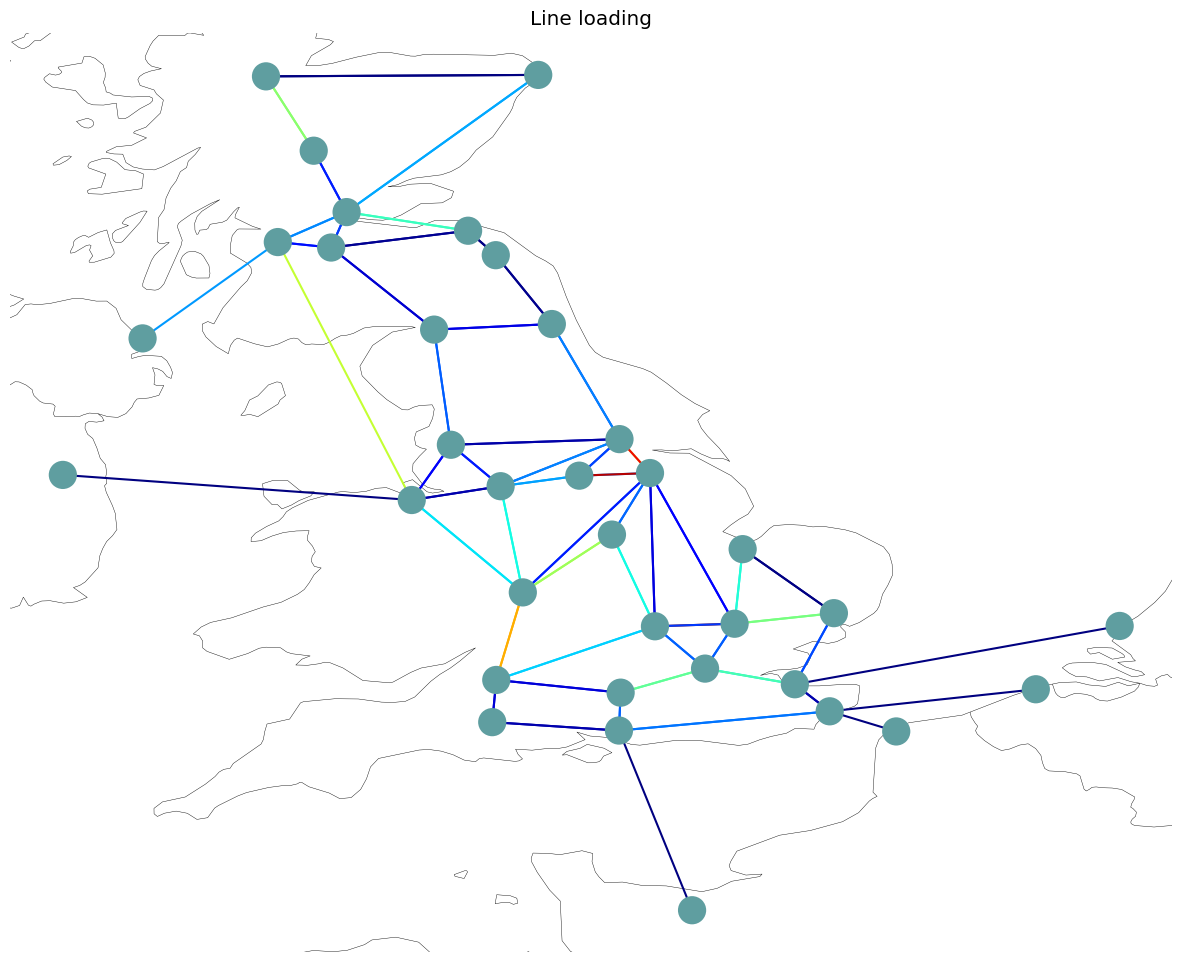

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



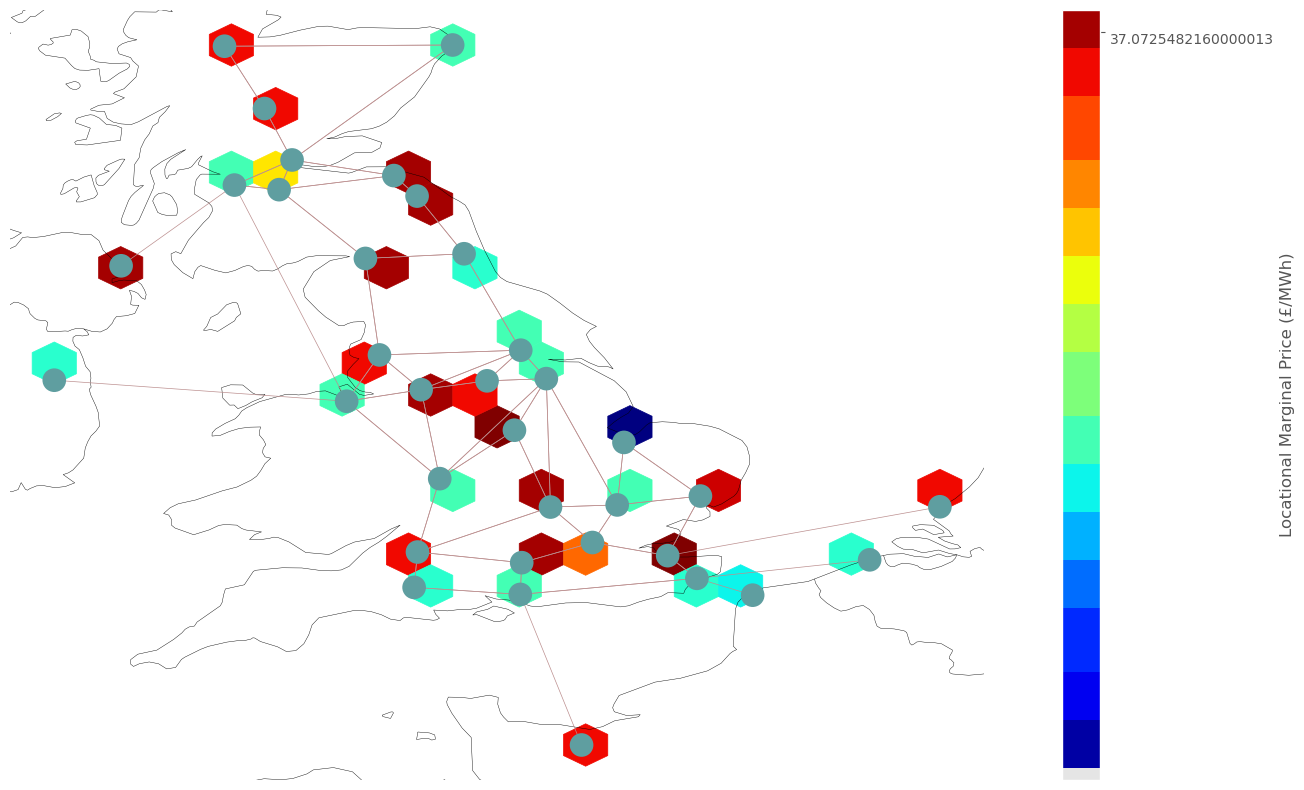

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

## Plotting curtailment

C:\Users\alyden\AppData\Local\Temp\ipykernel_13604\601895047.py:5: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



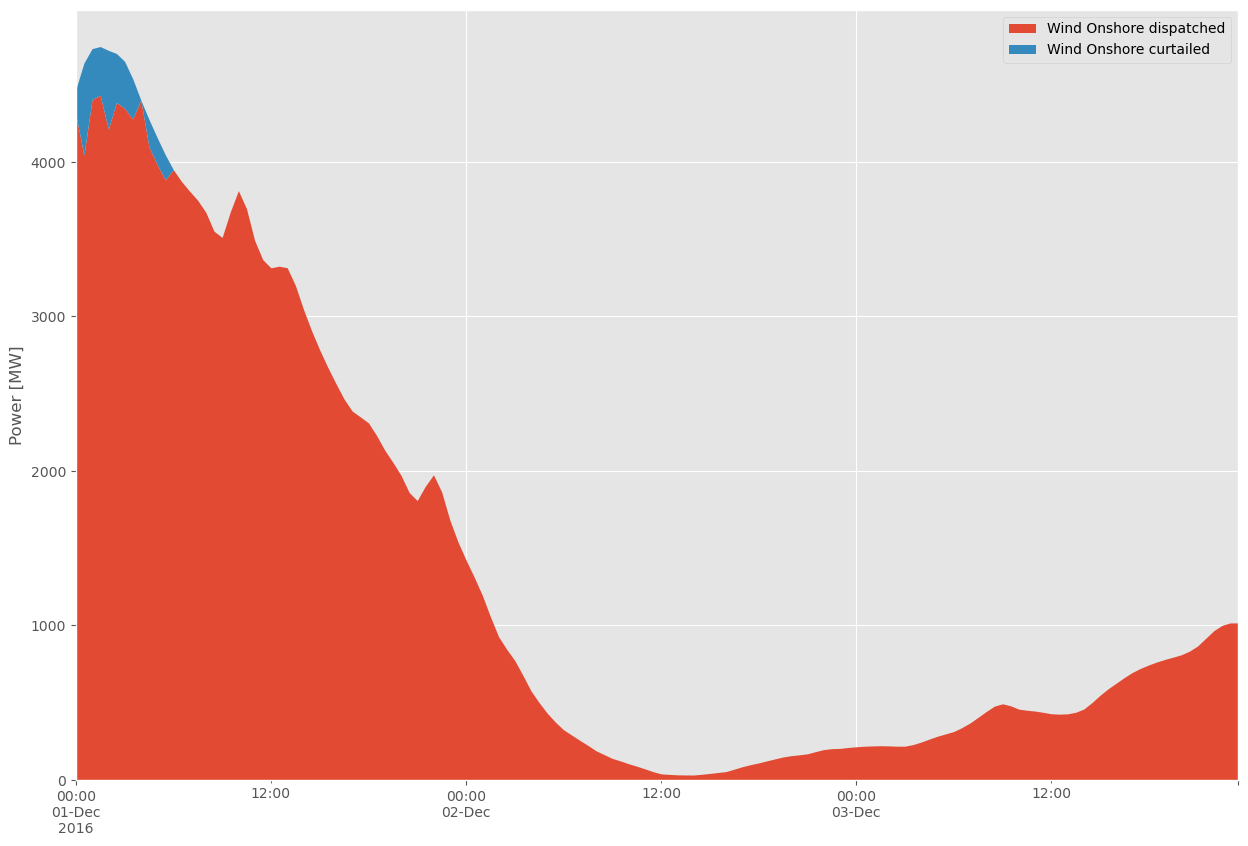

In [14]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()